<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Parcial_1_Juanse_Emily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicios: Raíces polinomios


In [60]:
#Raíces de los primeros 5 polinomios de Laguerre
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = sp.symbols('x')

def laguerre(n):
    if n == 0:
        return 1
    elif n == 1:
        return 1 - x
    else:
        L_n = laguerre(n-1)
        L_n_minus_1 = laguerre(n-2)
        return ((2*(n-1) + 1 - x) * L_n - (n-1) * L_n_minus_1) / n

def derivada(f, x_val, h=1e-6):
    return (f(x_val + h) - f(x_val)) / h

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x_n = x0
    for i in range(max_iter):
        f_xn = f(x_n)
        df_xn = df(x_n)

        if df_xn == 0:
            print("La derivada es cero en la iteración", i, ". No se puede continuar.")
            return None

        x_nuevo = x_n - f_xn / df_xn

        if abs(x_nuevo - x_n) < tol:
            print("Convergencia alcanzada en la iteración", i, ". Raíz aproximada:", x_nuevo)
            return x_nuevo

        x_n = x_nuevo

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return None

def funcion_numerica(Ln):
    return sp.lambdify(x, Ln, "numpy")

for n in range(1, 6):
    L_n_simb = laguerre(n)
    L_n_func = funcion_numerica(L_n_simb)
    derivada_Ln_func = lambda x_val: derivada(L_n_func, x_val)

    print("Polinomio de Laguerre L_", n, "(x):", L_n_simb)

    x0 = 1.0
    raiz = newton_raphson(L_n_func, derivada_Ln_func, x0)

    if raiz is not None:
        print("Raíz aproximada del polinomio de Laguerre L_", n, "(x):", raiz)
    print('-' * 50)

Polinomio de Laguerre L_ 1 (x): 1 - x
Convergencia alcanzada en la iteración 0 . Raíz aproximada: 1.0
Raíz aproximada del polinomio de Laguerre L_ 1 (x): 1.0
--------------------------------------------------
Polinomio de Laguerre L_ 2 (x): (1 - x)*(3 - x)/2 - 1/2
Convergencia alcanzada en la iteración 4 . Raíz aproximada: 0.585786437626905
Raíz aproximada del polinomio de Laguerre L_ 2 (x): 0.585786437626905
--------------------------------------------------
Polinomio de Laguerre L_ 3 (x): 2*x/3 + (5 - x)*((1 - x)*(3 - x)/2 - 1/2)/3 - 2/3
Convergencia alcanzada en la iteración 5 . Raíz aproximada: 0.41577455678356495
Raíz aproximada del polinomio de Laguerre L_ 3 (x): 0.41577455678356495
--------------------------------------------------
Polinomio de Laguerre L_ 4 (x): -3*(1 - x)*(3 - x)/8 + (7 - x)*(2*x/3 + (5 - x)*((1 - x)*(3 - x)/2 - 1/2)/3 - 2/3)/4 + 3/8
Convergencia alcanzada en la iteración 4 . Raíz aproximada: 4.536620296921129
Raíz aproximada del polinomio de Laguerre L_ 4 (x)

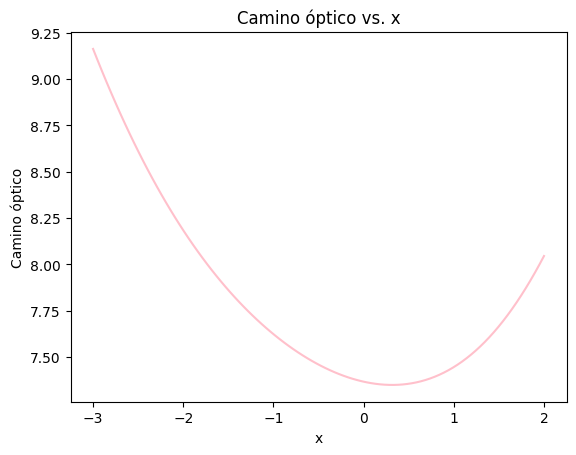

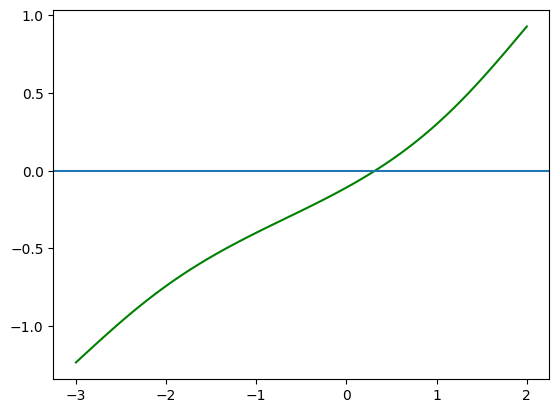

In [62]:
#Minimización del camino óptico

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

T= np.array ([-3, 2])
R= np.array ([2,-2])
n0= 1
n1= 1.33
def camino_optico (x):
  return (np.sqrt((x+3)**2+(4)))+(1.33*np.sqrt((x-2)**2+4))

xd= np.linspace (-3,2,100)
y= camino_optico(xd)
plt.plot (xd,y, c= "pink")
plt.xlabel('x')
plt.ylabel('Camino óptico')
plt.title('Camino óptico vs. x')

plt.show ()


def derivada_co (camino_optico, x, h=1e-5):
  return (((camino_optico(x+h)-camino_optico(x-h)))/(2*h))

def segunda_derivada (camino_optico, x, h=1e-5):
    return (((camino_optico(x+h)-2*camino_optico(x)+camino_optico(x-h))/(h**2)))

plt.plot(xd,derivada_co(camino_optico,xd,h), c= "green")
plt.axhline(y=0)


In [57]:
def Newton(f,df,xo,itmax=1000,precision=1e-11):
  error=1
  i=0
  while error > precision and i< itmax:
    xn = xo - f(camino_optico,xo, h=1e-5)/df(camino_optico,xo, h=1e-5)
    error = np.abs(f(camino_optico,xo, h=1e-5)/df(camino_optico,xo, h=1e-5))
    xo = xn
    i += 1
  return xn

In [58]:
Newton(derivada_co,segunda_derivada,1, itmax=1000, precision=1e-11)

0.3169057571335544

Ejercicios: Interpolación de Lagrange

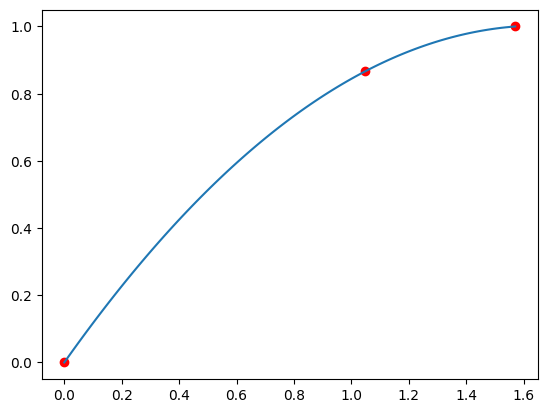

In [70]:
X = sym.Symbol('x', real=True)
x_s=np.array([0,np.pi/3, np.pi/2])

def f_1(x):
  return np.sin(x)

y=np.array(f_1(x_s))

plt.scatter(x_s,y, color='r')

def Bases_Cardinales(X,i,x_s):
  Base=1
  for j in range(len(x_s)):
    if j!=i:
      Base *= ((X-x_s[j])/(x_s[i]-x_s[j]))
  return Base

def Poly_interpolacion(X,x_s,y):
  poly = 0
  for i in range(len(x_s)):
    poly += y[i]*Bases_Cardinales(X,i,x_s)
  return poly

xpoly=np.linspace(0,np.pi/2,100)
plt.plot(xpoly,Poly_interpolacion(xpoly,x_s,y))
plt.show()



In [71]:
poly=Poly_interpolacion(X,x_s,y)
poly.expand()

-0.363586737855857*x**2 + 1.2077404846629*x

In [72]:
Estimado = Poly_interpolacion(X,x_s,y).subs(X,np.pi/8)
Estimado

0.418208934443120

In [73]:
Valor_real = np.sin(np.pi/8)
Valor_real

0.3826834323650898

In [74]:
Error = abs(Valor_real-Estimado)
Error

0.0355255020780303

In [75]:
def tercera_derivada_exacta(x):
  return np.cos(x)*(-1)

E=tercera_derivada_exacta(np.pi/8)

def Error_Chulo(X,E,x,n):
  mult=1
  for i in range(n):
    mult *= (X-x[i])
  return (E*mult)/(np.math.factorial(n+1))

Error_Chulo(np.pi/8,E,x_s,2)

<ipython-input-75-97c893db79e8>:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (E*mult)/(np.math.factorial(n+1))


0.0395760655388445